<a href="https://colab.research.google.com/github/DS3001/group19/blob/main/Project_2_Cleansing%2C_EDA%2C_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleansing Training & Testing Data

In [76]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
df_train = pd.read_csv('https://raw.githubusercontent.com/aniishap/group-19/main/project_2/data/testing_data.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/aniishap/group-19/main/project_2/data/training_data.csv')

In [77]:
df_train.isnull().sum() #  bmi column has a total of 42 missing values

Unnamed: 0            0
id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  42
smoking_status        0
stroke                0
dtype: int64

In [78]:
df_test.isnull().sum() #  bmi column has a total of 159 missing values

Unnamed: 0             0
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  159
smoking_status         0
stroke                 0
dtype: int64

In [79]:
# To avoid introducing bias, I am going to drop the NA values from the training and testing data sets instead of imputing averages for the bmi column
df_train.dropna(subset=['bmi'], inplace=True)
df_test.dropna(subset=['bmi'], inplace=True)
df_train.isnull().sum() # No more NA Values

Unnamed: 0           0
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [80]:
df_test.isnull().sum() # No more NA values

Unnamed: 0           0
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [81]:
# Drop 'Unnamed:0' and 'id' columns because they are not useful in our study
list=['Unnamed: 0', 'id']
df_train=df_train.drop(list,axis=1)
df_test=df_test.drop(list,axis=1)

In [82]:
unknown_count_train = (df_train['smoking_status'] == 'Unknown').sum()
print(unknown_count_train)
# Do we want to drop all 'Unknown' rows?
# There are only supposed to be 3 levels to this variable

288


In [83]:
unknown_count_test = (df_test['smoking_status'] == 'Unknown').sum()
print(unknown_count_test)

1195


In [84]:
# These are a lot of Unknown values, and it wouldn't make sense to drop all the rows.
# I think in this case, we can impute average values to replace 'Unknown' because
# smoking can be a big health influence on other factors. There could exist some
# response bias and cases where smoking info is deliberately not recorded, so
# to address that, we can infer the smoking status based on data from other
# variables

print(df_train)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  58.0             1              0          Yes        Private   
1     Female   8.0             0              0           No        Private   
2     Female  70.0             0              0          Yes        Private   
3     Female  47.0             0              0          Yes        Private   
4     Female  74.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
1015  Female  48.0             0              0          Yes        Private   
1016    Male  78.0             0              0          Yes  Self-employed   
1019  Female  73.0             0              0          Yes  Self-employed   
1020    Male  57.0             0              0          Yes        Private   
1021  Female  75.0             0              0          Yes  Self-employed   

     Residence_type  avg_glucose_level   bmi   smok

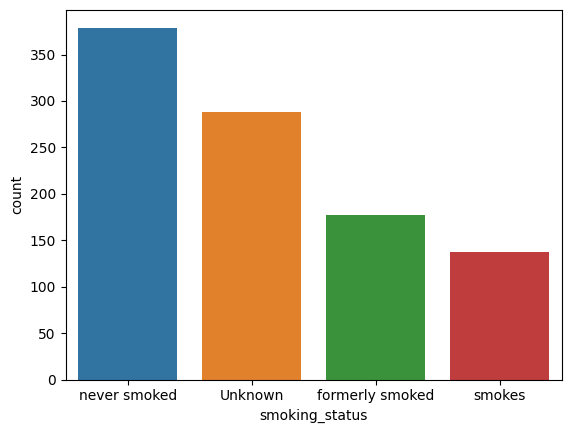

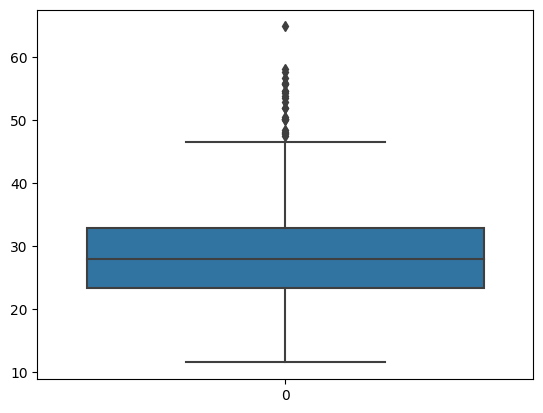

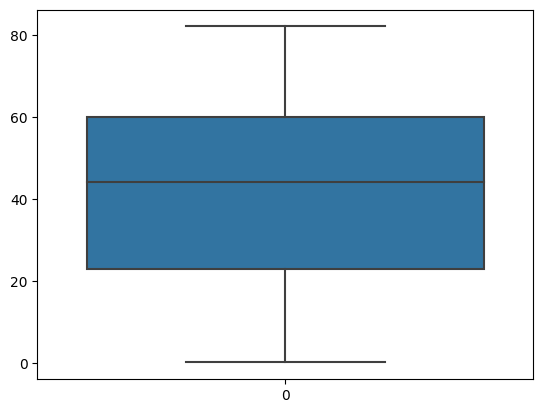

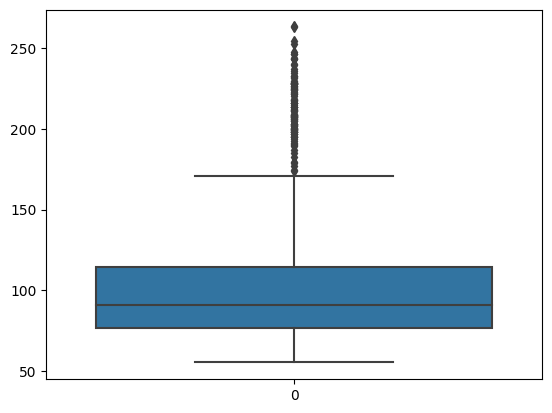

In [85]:
sns.countplot(x='smoking_status', data=df_train)
plt.show()
sns.boxplot(df_train['bmi'])
plt.show()
sns.boxplot(df_train['age'])
plt.show()
sns.boxplot(df_train['avg_glucose_level'])
plt.show()

In [91]:
#Windsorizing to BMI and avg_glucose_level to handle of outliers

def windsorize(x):
    pct25, pct75 = np.percentile(x, [25, 75])
    iqr = pct75 - pct25
    lower_whisker = pct25 - iqr * 1.5
    upper_whisker = pct75 + iqr * 1.5
    x_windsor = x.copy()
    x_windsor[x < lower_whisker] = lower_whisker
    x_windsor[x > upper_whisker] = upper_whisker
    return x_windsor

numeric = ["age", "bmi", "avg_glucose_level"]
for i in numeric:
  df_train[i] = windsorize(df_train[i])




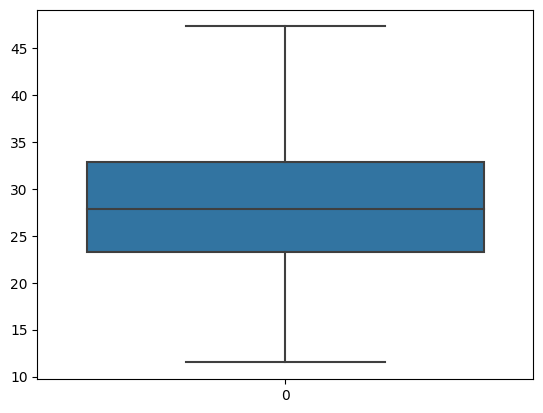

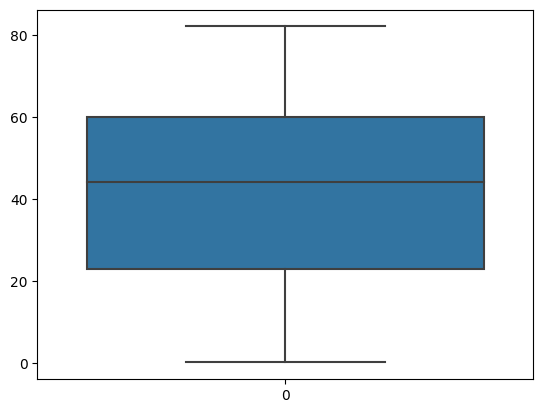

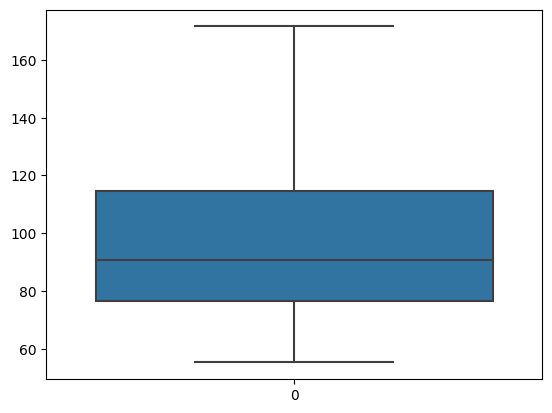

In [92]:

#Checking
sns.boxplot(df_train['bmi'])
plt.show()
sns.boxplot(df_train['age'])
plt.show()
sns.boxplot(df_train['avg_glucose_level'])
plt.show()

In [93]:


df = df_train
df= pd.get_dummies(df['smoking_status'],dtype='int')
df.head()
df= pd.get_dummies(X['Residence_type'],dtype='int')
df.head()
df= pd.get_dummies(X['gender'],dtype='int')
df.head()
df= pd.get_dummies(X['ever_married'],dtype='int')
df.head()
df= pd.get_dummies(X['work_type'],dtype='int')
df.head()

,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
